# Charge et exploration de données

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [43]:
# download the data from web and saved to local directory
# put the data in a variable make the following code usable for any data sources
##data_dir = "C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3\\data"
data_dir  = "C:\\Users\\Nisha Haulkhory\\Desktop\\projet de synthese\\fer2013.csv"

In [44]:
# Original data is hold by df
df = pd.read_csv(data_dir )
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [45]:
df.shape

(35887, 3)

In [46]:
split = list(set(df['Usage']))
print(split)

['PrivateTest', 'Training', 'PublicTest']


In [47]:
df_training = df[df['Usage']=='Training']
df_PublicTest = df[df['Usage']=='PublicTest']
df_PrivateTest = df[df['Usage']=='PrivateTest']

df_training.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [48]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [50]:
df['length'] = df.pixels.apply(lambda x: len(str(x).split(' ')))
df.head()

,emotion,pixels,Usage,length
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,2304
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,2304
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,2304
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,2304
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,2304


In [51]:
lab = df.emotion.value_counts()
lab = pd.DataFrame(lab)
lab.head()


,emotion
3,8989
6,6198
4,6077
2,5121
0,4953


# Nettoyage de données

In [52]:
no_data = sum(df.length.isna())
no_data

0

* Nous constatons que Les données n'ont pas de valeur manquante 
* La distribution des emotions montre qu'il y a plus de catégorie 3 et moins de catégorie 1

# Points particulier

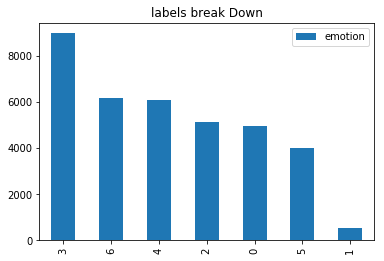

In [53]:
lab.plot.bar(title="labels break Down")

* Les données contient essentiellement deux colonnes: emotion est la cible (catégories) et pixels l'image 48x48 = 2304

* L'autre colonne, Usage, est une parition des données: Training, PublicTest, PrivateTest
* Nous allons utiliser la partie Training pour developper le modele et PrivateTest pour tester notre modele
* En fin, la partie PublicTest sera utilisée pour la validation

Neutral


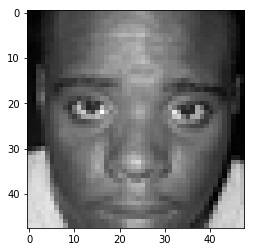

In [54]:
import numpy as np
import matplotlib.pyplot as plt
FER2013_WIDTH = 48
FER2013_HEIGHT = 48
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]  # indices 0 to 6
def fer2013_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(df_training.at[index, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
    #image -= np.mean(image)
    #image /= np.std(image)
    print(Emotions[df_training.at[index, "emotion"]])
    plt.imshow(image, cmap="gray")
fer2013_show_instance(np.random.randint(0,len(df_training)))

In [55]:
def fer2013_to_X():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = df_training["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
   # X -= np.mean(X, axis=0)
    X = X/255
    
    return X

In [56]:
def fer2013_to_Y():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = df_PrivateTest["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
   # X -= np.mean(X, axis=0)
    X = X/255
    
    return X

In [57]:
X=fer2013_to_X()
X_test = fer2013_to_Y()

In [58]:
X.shape
#X[0].shape
#X_test.shape
print(X.shape)
print(X_test.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)


In [59]:
 #Get labels (one-hot encoded)
Y = pd.get_dummies(df_training['emotion']).values
Y_test = pd.get_dummies(df_PrivateTest['emotion']).values
#Y.shape
print(Y_test.shape)



(3589, 7)


In [60]:
#print(np.max(X[0]))
#print(np.min(X[0]))
print(np.max(X_test[0]))
print(np.min(X_test[0]))

1.0
0.17647058823529413


# Let us reshape the images so that it's of size 48 x 48 x 1, and feed this as an input to the network.

The reason you need to reshape your data is that Tensorflow expects a certain input shape for its Deep Learning Model, i.e., in this case, a Convolution Neural Network, specifically:

(<number of images>, <image x_dim>, <image y_dim>, <number of channels>)

In [61]:
# Reshape training and testing image
X= X.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)
input_shape = X.shape
Y.shape


(28709, 7)

# The Deep Neural Network

First, we will define the Convolutional neural networks architecture as follows:

1- The first hidden layer is a convolutional layer called a Convolution2D. We will use 32 filters with size 5×5 each.

2- Then a Max pooling layer with a pool size of 2×2.

3- Another convolutional layer with 64 filters with size 5×5 each.

4- Then a Max pooling layer with a pool size of 2×2.

5- Then next is a Flatten layer that converts the 2D matrix data to a 1D vector before building the fully connected layers.

6- After that we will use a fully connected layer with 1024 neurons and relu activation function.

7- Then we will use a regularization layer called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.

8- Finally, the output layer which has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.


In [62]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
import tensorflow as tf

# Step 1 – Create a model:

Keras first creates a new instance of a model object and then add layers to it one after the another. It is called a sequential model API. We can add layers to the neural network just by calling model.add and passing in the type of layer we want to add. Finally, we will compile the model with two important information, loss function, and cost optimization algorithm.

In [99]:
# Creating a Sequential Model and adding the layers
input_shape = (48, 48, 1)
model = Sequential()
#first layer
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#second layer
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(7,activation=tf.nn.softmax)) 

# Network Parameters

Next, you need to define the network parameters. Firstly, you define the number of inputs. This is 2304 since the image is initially loaded as a 2304-dimensional vector. Later, you will see that how you will reshape the 2304-dimensional vector to a 48 x 48 x 1 matrix. Secondly, you'll also define the number of classes, which is nothing else than the number of class labels.here 7

In [100]:
#Compile the model
optimizer = 'adam'
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 

In [101]:
model.summary() 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 44, 44, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                331840    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [103]:
l = model.fit(x=X,y=Y,validation_data = (X_test, Y_test), batch_size=100,epochs=10) 

Epoch 1/10
288/288 [==============================] - 70s 244ms/step - loss: 1.6853 - accuracy: 0.3340 - val_loss: 1.5071 - val_accuracy: 0.4210
Epoch 2/10
288/288 [==============================] - 74s 255ms/step - loss: 1.4749 - accuracy: 0.4324 - val_loss: 1.4175 - val_accuracy: 0.4494
Epoch 3/10
288/288 [==============================] - 73s 252ms/step - loss: 1.3668 - accuracy: 0.4745 - val_loss: 1.3952 - val_accuracy: 0.4600
Epoch 4/10
288/288 [==============================] - 72s 250ms/step - loss: 1.2910 - accuracy: 0.5034 - val_loss: 1.3487 - val_accuracy: 0.4926
Epoch 5/10
288/288 [==============================] - 71s 247ms/step - loss: 1.2302 - accuracy: 0.5324 - val_loss: 1.3115 - val_accuracy: 0.4987
Epoch 6/10
288/288 [==============================] - 72s 249ms/step - loss: 1.1529 - accuracy: 0.5629 - val_loss: 1.2930 - val_accuracy: 0.5049
Epoch 7/10
288/288 [==============================] - 71s 248ms/step - loss: 1.0868 - accuracy: 0.5928 - val_loss: 1.2949 - val_ac

# Evaluate Model

In [104]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

Evaluate on test data
113/113 [==============================] - 3s 23ms/step - loss: 1.3774 - accuracy: 0.5174
test loss, test acc: [1.3774218559265137, 0.5174143314361572]


In [105]:
l.history

{'loss': [1.6853328943252563,
  1.4749324321746826,
  1.3667538166046143,
  1.2909959554672241,
  1.2301756143569946,
  1.152944564819336,
  1.0867840051651,
  1.0212585926055908,
  0.957560658454895,
  0.8833183646202087],
 'accuracy': [0.33400675654411316,
  0.432407945394516,
  0.4744853675365448,
  0.5033613443374634,
  0.5323765873908997,
  0.5628548264503479,
  0.5928454399108887,
  0.615242600440979,
  0.6382319331169128,
  0.6727159023284912],
 'val_loss': [1.507125735282898,
  1.4175432920455933,
  1.3952341079711914,
  1.3486928939819336,
  1.31150484085083,
  1.2929617166519165,
  1.2948983907699585,
  1.3162387609481812,
  1.3564549684524536,
  1.377421259880066],
 'val_accuracy': [0.4210086464881897,
  0.4494287967681885,
  0.46001672744750977,
  0.49261632561683655,
  0.4987461566925049,
  0.5048760175704956,
  0.507662296295166,
  0.5012538433074951,
  0.5012538433074951,
  0.5174143314361572]}

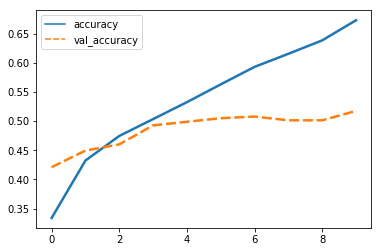

In [106]:
import seaborn as sns
df_history = pd.DataFrame(l.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

# Predict

In [107]:
# load test data and make prediction
y_pred= model.predict(X_test)

In [108]:
# convert prediction to df
submission = pd.DataFrame(data=y_pred)

# set label as the 0-6 class with highest value 
submission['Label'] = submission.idxmax(axis=1)
submission['ImageId'] = np.asarray([i+1 for i in range(submission.shape[0])])

In [109]:
submission.head()

,0,1,2,3,4,5,6,Label,ImageId
0,0.431666,0.049297,0.103845,0.015000,0.069788,0.134498,0.195907,0,1
1,0.048420,0.004936,0.059096,0.199386,0.664509,0.001540,0.022113,4,2
2,0.122297,0.000604,0.197152,0.357614,0.053312,0.142704,0.126316,3,3
3,0.036983,0.015570,0.121944,0.194770,0.359524,0.070863,0.200347,4,4
4,0.281617,0.106835,0.141429,0.003087,0.284631,0.027658,0.154743,4,5


In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(submission['Label'],df_PrivateTest['emotion'])

In [111]:
print(pd.DataFrame(cm))

     0   1    2    3    4    5    6
0  196  17   74   59   77   14   45
1    4  18    2    0    0    0    1
2   65   7  165   40   78   53   46
3   55   3   47  647   71   29   74
4   86   2  107   65  232   14  112
5   18   0   62   17   29  285   34
6   67   8   71   51  107   21  314


# HYPERPARAMETER OPTIMISATION